<h1>BIg Data Analysis<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-Data" data-toc-modified-id="Read-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read Data</a></span></li><li><span><a href="#Analyze-Data" data-toc-modified-id="Analyze-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analyze Data</a></span></li><li><span><a href="#Predict-Data" data-toc-modified-id="Predict-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Predict Data</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#Polynomial-Regression" data-toc-modified-id="Polynomial-Regression-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Polynomial Regression</a></span></li></ul></li></ul></div>

# Read Data

In [1]:
import pandas as pd
df = pd.read_csv("广东居民消费水平.csv", index_col=0)
df

全部居民（元）  农村居民（元）  城镇居民（元）  城乡消费水平对比  全国居民同比指数  农村居民同比指数  城镇居民同比指数
统计时间                                                                   
1997   1479.0   1075.0   3974.0       3.7      98.0      98.0      96.7
1998   1511.0   1072.0   4197.0       3.9     100.5      99.7     101.5
1999   1542.0   1082.0   4334.0       4.0     102.1     100.9     103.3
2000   1608.0   1120.0   4517.0       4.0     104.2     103.5     104.2
2001   1631.0   1137.0   4529.0       4.0     101.5     101.5     100.3
2002   1701.0   1186.0   4690.0       4.0     103.5     102.8     103.8
2003   1770.0   1213.0   4964.0       4.1     103.3     102.1     104.4
2004   1946.0   1309.0   5477.0       4.2     104.2     100.8     106.7
2005   3140.0   1563.0   7498.0       4.8     114.7     115.4     110.8
2006   3499.0   1630.0   8507.0       5.2     109.9     102.5     112.1
2007   4057.0   1895.0   9662.0       5.1     108.9     105.8     108.3
2008   4426.0   2142.0  10106.0       4.7     103.5     101.9     101.9
2009   5044.0   2459.0  11223.0       4.6     111.5     112.6     108.5
2010   5879.0   2926.0  12221.0       4.2     113.7     114.7     106.9
2011   7389.0   3986.0  13877.0       3.5     118.8     123.8     109.8
2012   8372.0   4448.0  15441.0       3.5     109.2     110.9     105.5
2013   9541.0   5383.0  16581.0       3.1     112.7     118.7     106.7
2014  11362.0   6620.0  18804.0       2.8     113.1     111.9     110.2
2015  12876.0   7866.0  20082.0       2.6     109.9     110.1     106.7
2016  14666.0   8887.0  22301.0       2.5     112.6     112.0     109.6

# Analyze Data

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib.font_manager import FontProperties


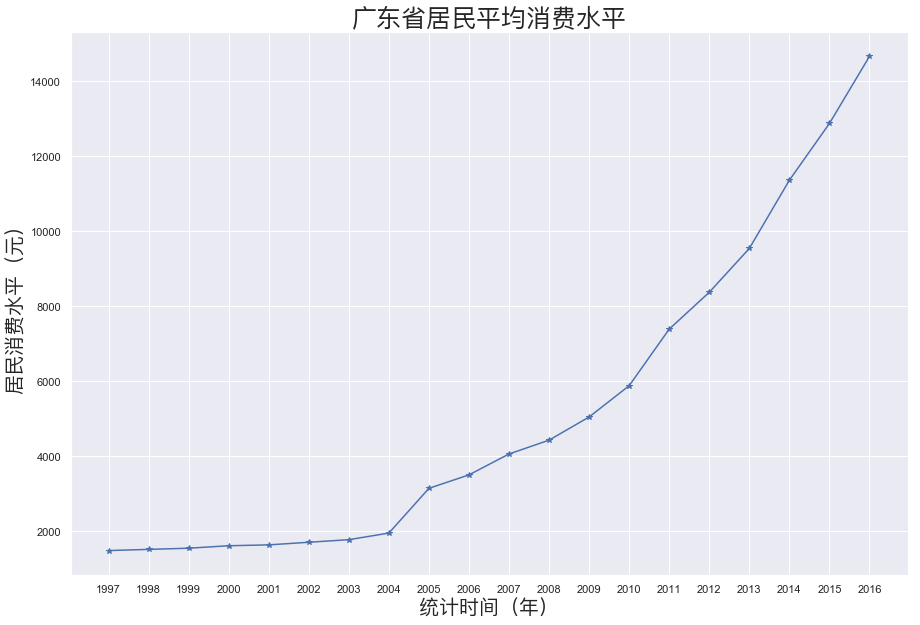

In [3]:
plt.figure(figsize=(15, 10))
plt.xticks(df.index)
plt.xlabel(
    "统计时间（年）",
    fontproperties=FontProperties(
        fname='/System/Library/Fonts/PingFang.ttc', size=20))
plt.ylabel(
    "居民消费水平（元）",
    fontproperties=FontProperties(
        fname='/System/Library/Fonts/PingFang.ttc', size=20))
plt.title(
    "广东省居民平均消费水平",
    fontproperties=FontProperties(
        fname='/System/Library/Fonts/PingFang.ttc', size=25))
plt.plot(df.index, df['全部居民（元）'], '*-')

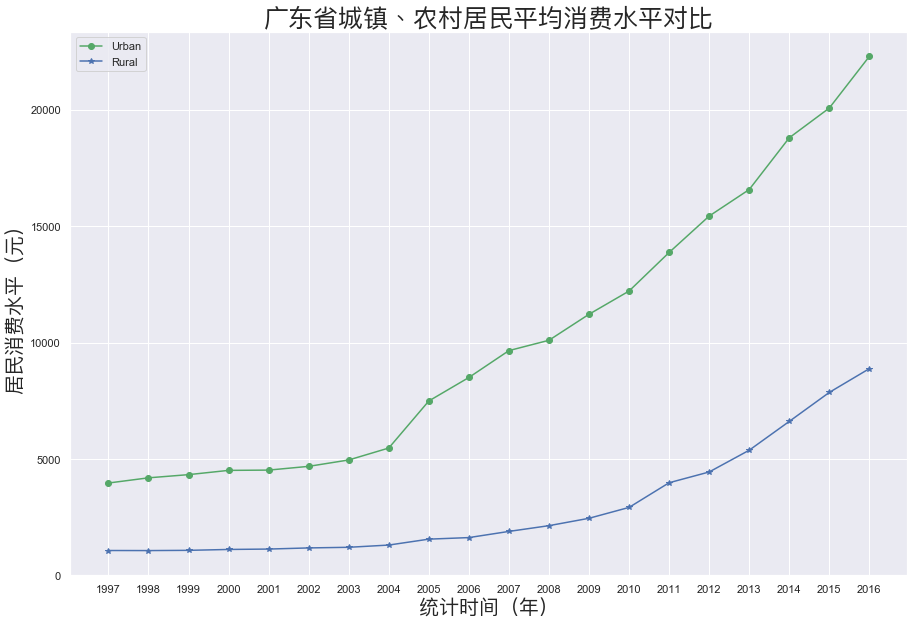

In [4]:
plt.figure(figsize=(15, 10))
plt.xticks(df.index)
plt.xlabel(
    "统计时间（年）",
    fontproperties=FontProperties(
        fname='/System/Library/Fonts/PingFang.ttc', size=20))
plt.ylabel(
    "居民消费水平（元）",
    fontproperties=FontProperties(
        fname='/System/Library/Fonts/PingFang.ttc', size=20))
plt.title(
    "广东省城镇、农村居民平均消费水平对比",
    fontproperties=FontProperties(
        fname='/System/Library/Fonts/PingFang.ttc', size=25))
plt.plot(df.index, df['城镇居民（元）'], 'go-', label="Urban")
plt.plot(df.index, df['农村居民（元）'], '*-', label="Rural")
plt.legend()

# Predict Data

## Linear Regression

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [6]:
X = df.index.values.reshape(-1, 1)
y = df['全部居民（元）'].values
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
model.predict(X)

array([-1029.47142857,  -376.69022556,   276.09097744,   928.87218045,
        1581.65338346,  2234.43458647,  2887.21578947,  3539.99699248,
        4192.77819549,  4845.5593985 ,  5498.3406015 ,  6151.12180451,
        6803.90300752,  7456.68421053,  8109.46541353,  8762.24661654,
        9415.02781955, 10067.80902256, 10720.59022556, 11373.37142857])

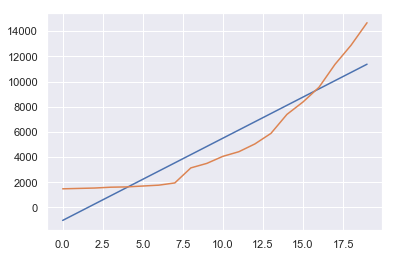

In [8]:
plt.plot(model.predict(X))
plt.plot(y)

## Polynomial Regression

In [9]:
from sklearn.preprocessing import PolynomialFeatures
polynomial = PolynomialFeatures(degree=10)  
X_transformed = polynomial.fit_transform(X)  #x每个数据对应的多项式系数

poly_linear_model = LinearRegression()  #创建回归器
poly_linear_model.fit(X_transformed, y)  #训练数据

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
poly_linear_model = LinearRegression()  #创建回归器
poly_linear_model.fit(X_transformed, y)  #训练数据

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

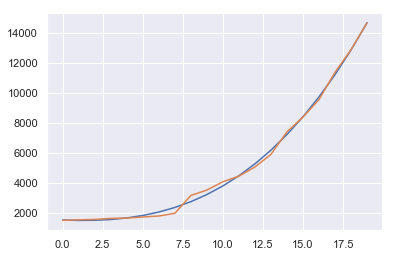

In [11]:
plt.plot(poly_linear_model.predict(X_transformed))
plt.plot(y)

In [12]:
X_total = np.array([i for i in range(1997, 2026)]).reshape(-1, 1)
X_total_transformed = polynomial.fit_transform(X_total)  #x每个数据对应的多项式系数

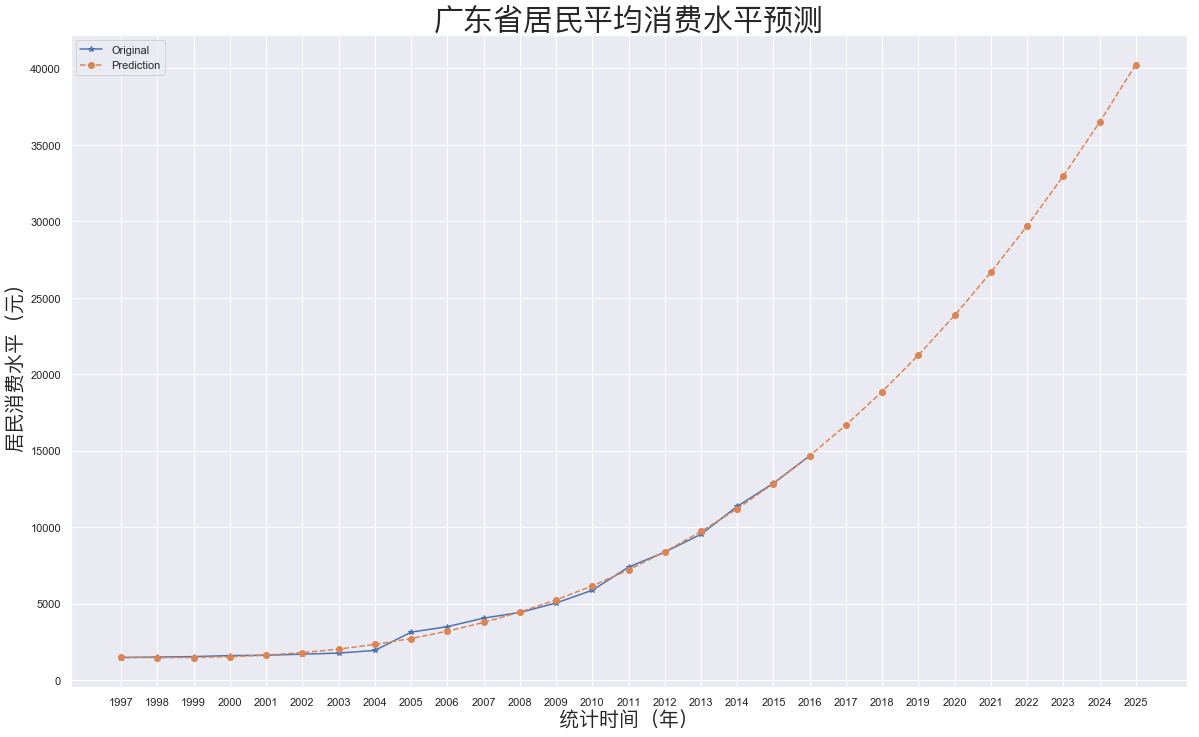

In [13]:
plt.figure(figsize=(20, 12))
plt.xticks(X_total)
plt.xlabel(
    "统计时间（年）",
    fontproperties=FontProperties(
        fname='/System/Library/Fonts/PingFang.ttc', size=20))
plt.ylabel(
    "居民消费水平（元）",
    fontproperties=FontProperties(
        fname='/System/Library/Fonts/PingFang.ttc', size=20))
plt.title(
    "广东省居民平均消费水平预测",
    fontproperties=FontProperties(
        fname='/System/Library/Fonts/PingFang.ttc', size=30))
plt.plot(df.index, df['全部居民（元）'], '*-', label="Original")
plt.plot(
    X_total,
    poly_linear_model.predict(X_total_transformed),
    'o--',
    label="Prediction")
plt.legend()

In [14]:
poly_linear_model.predict(X_total_transformed)

array([ 1503.29074498,  1474.36138792,  1482.50855227,  1535.04227515,
        1639.34791966,  1802.88662262,  2033.19574471,  2337.88932581,
        2724.65853949,  3201.27214833,  3775.576966  ,  4455.49831314,
        5249.04048367,  6164.2872097 ,  7209.40212317,  8392.62923117,
        9722.29337855, 11206.80072518, 12854.63922186, 14674.37907811,
       16674.67324944, 18864.2579114 , 21251.95294113, 23846.66240759,
       26657.37504978, 29693.16476889, 32963.19111653, 36476.69978876,
       40243.02311678])